Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

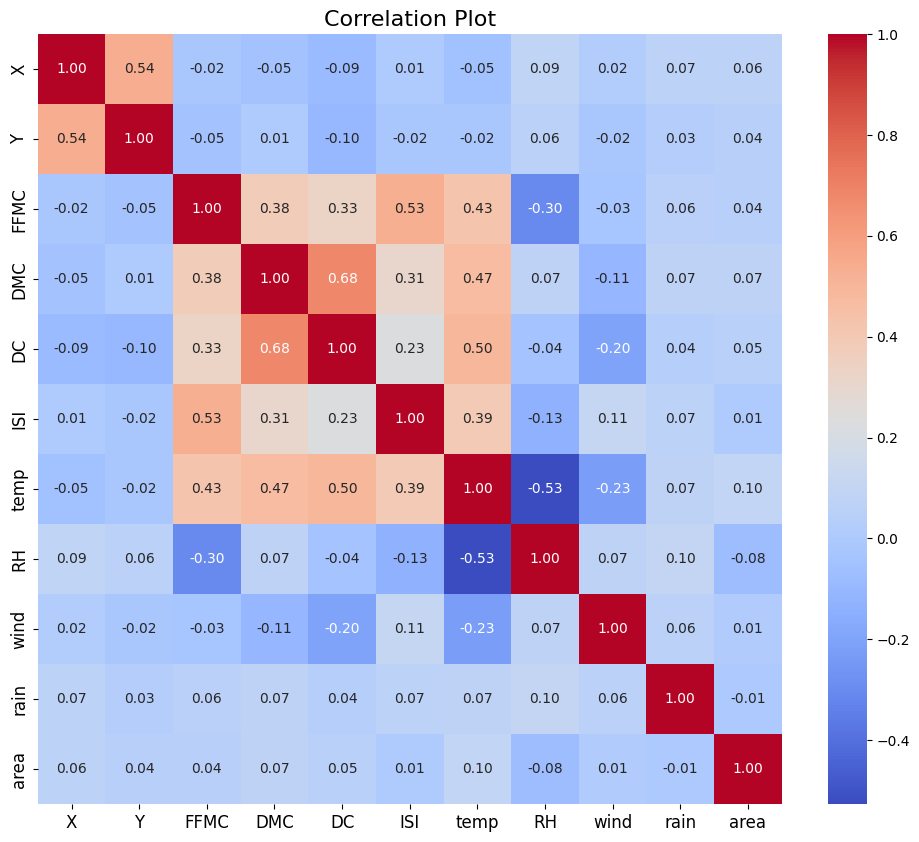

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('forestfires.csv')

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Plot', fontsize=16) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

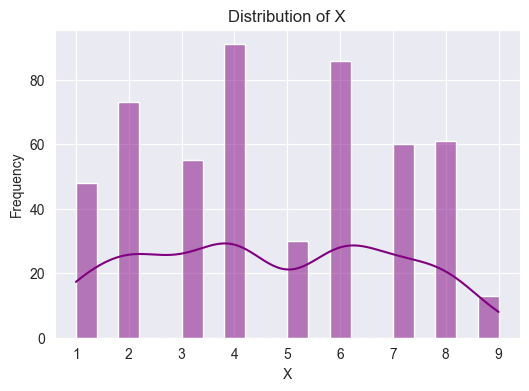

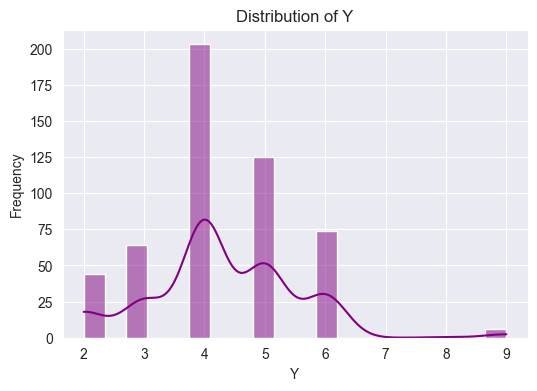

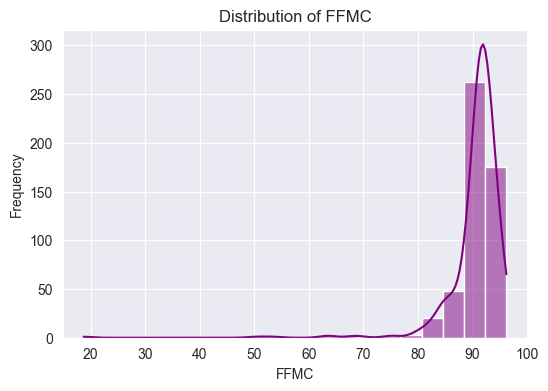

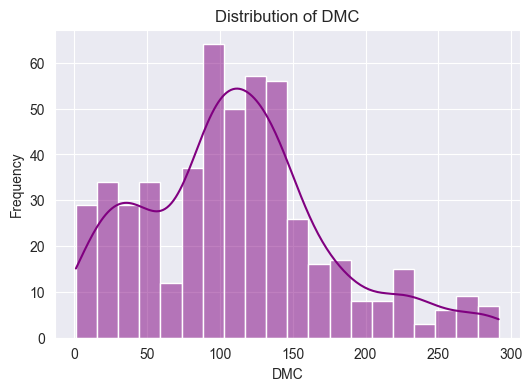

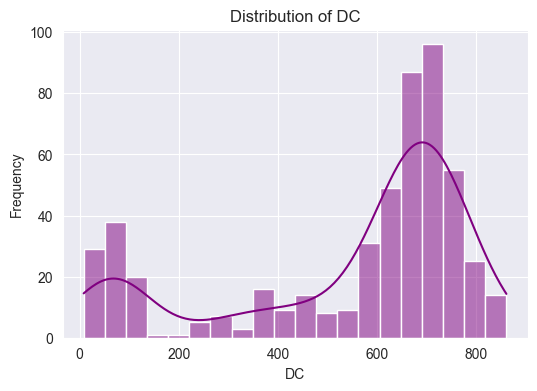

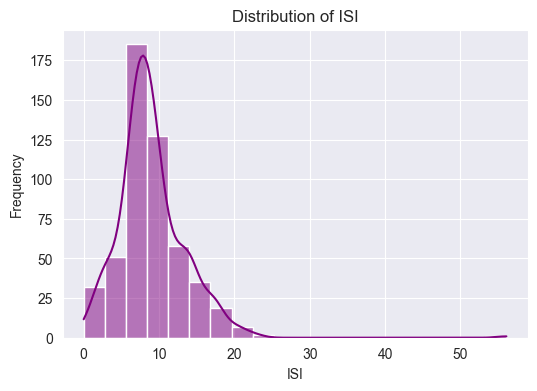

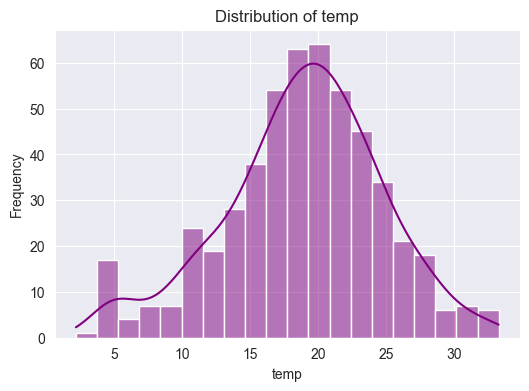

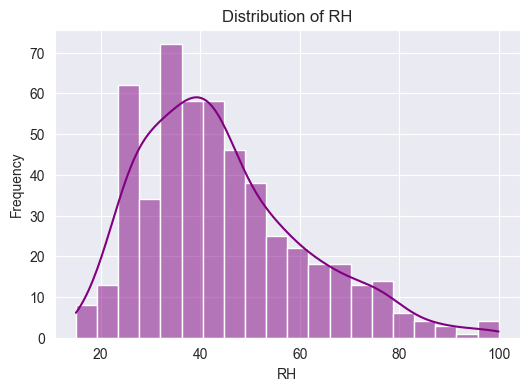

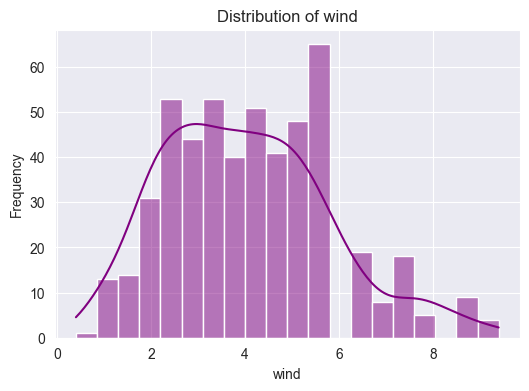

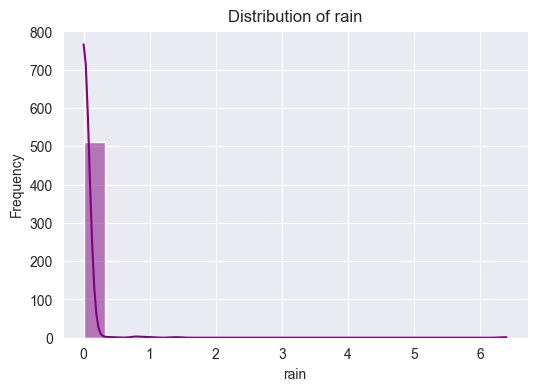

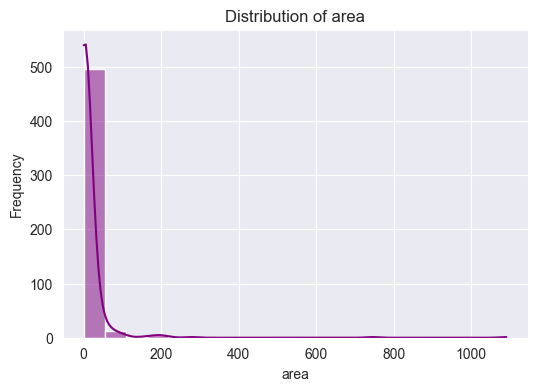

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('forestfires.csv')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the style to 'darkgrid'
sns.set_style("darkgrid")

# Loop through numeric columns and plot histograms
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color='purple', bins=20)  # Change colormap to 'mako' and set histogram color to purple
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Print summary statistics
summary_stats = df.describe()
print(summary_stats)

# Calculate skewness and kurtosis
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()

print("Skewness:")
print(skewness)

print("\nKurtosis:")
print(kurtosis)


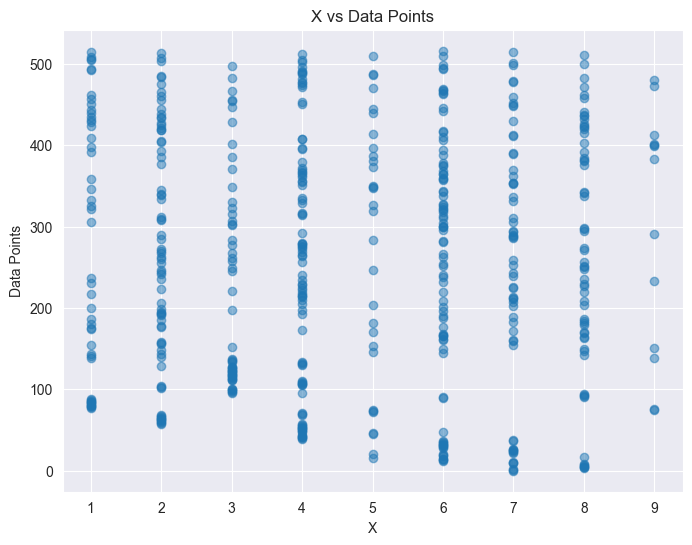

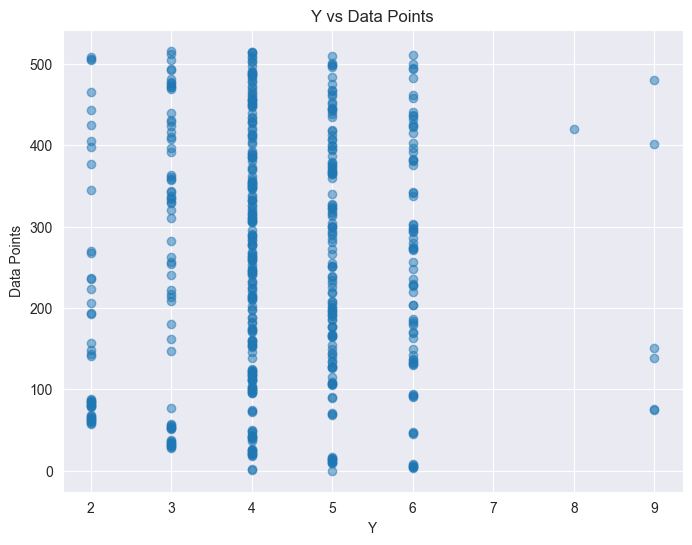

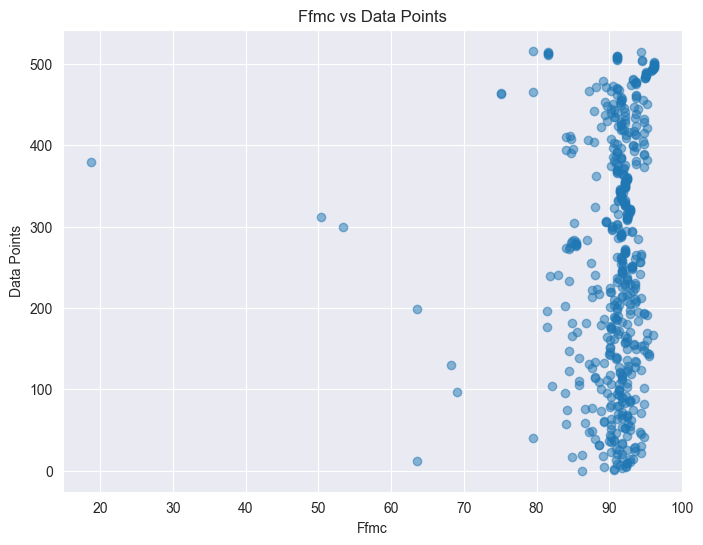

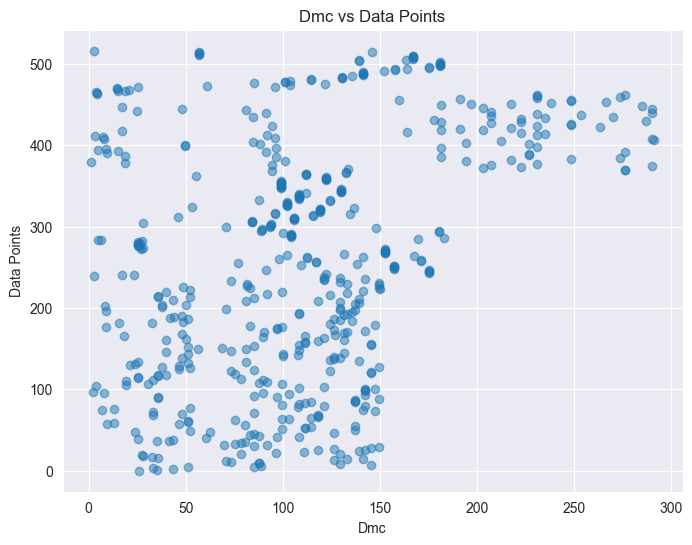

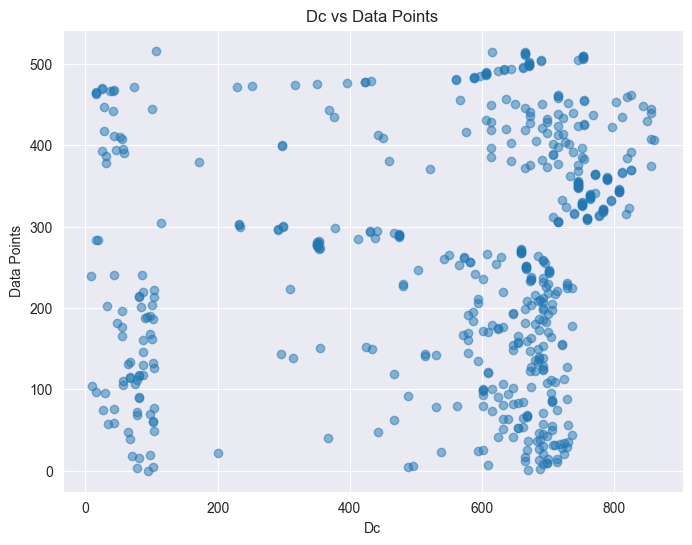

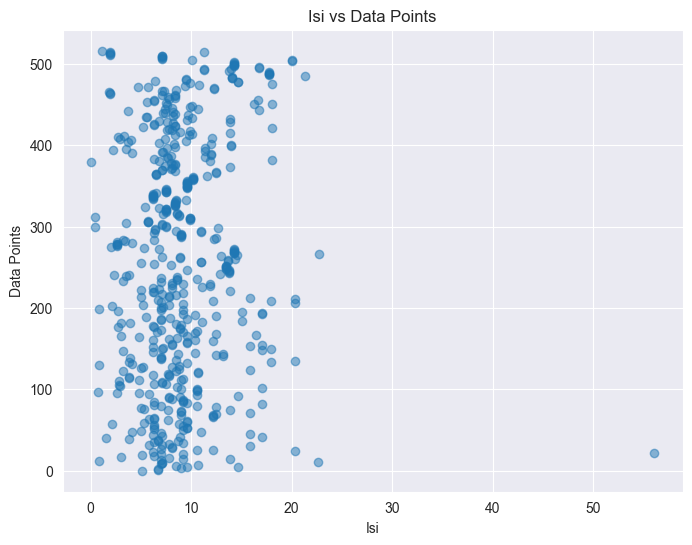

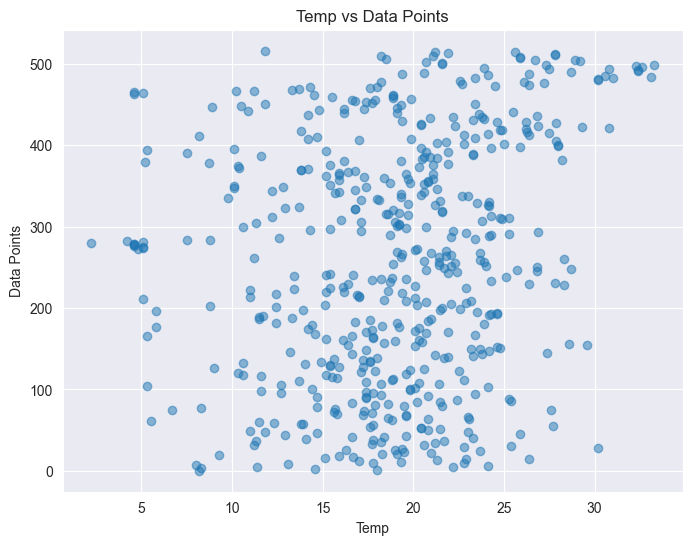

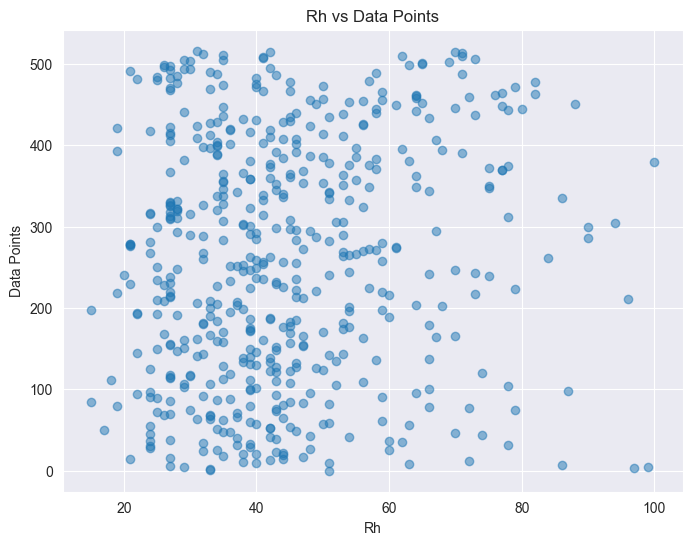

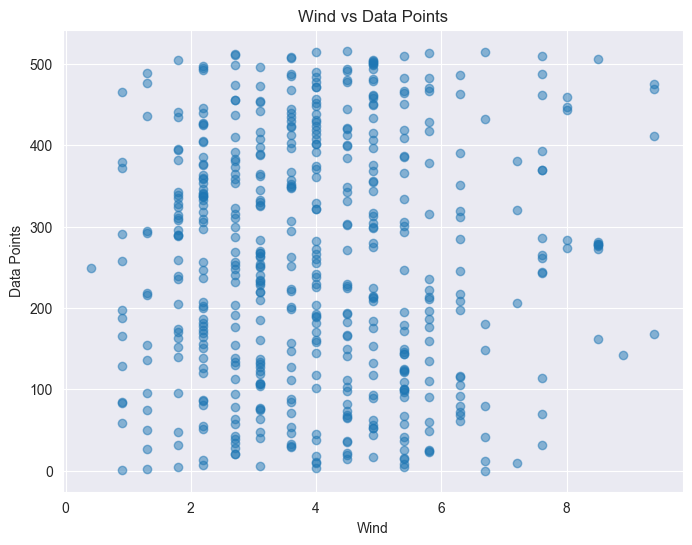

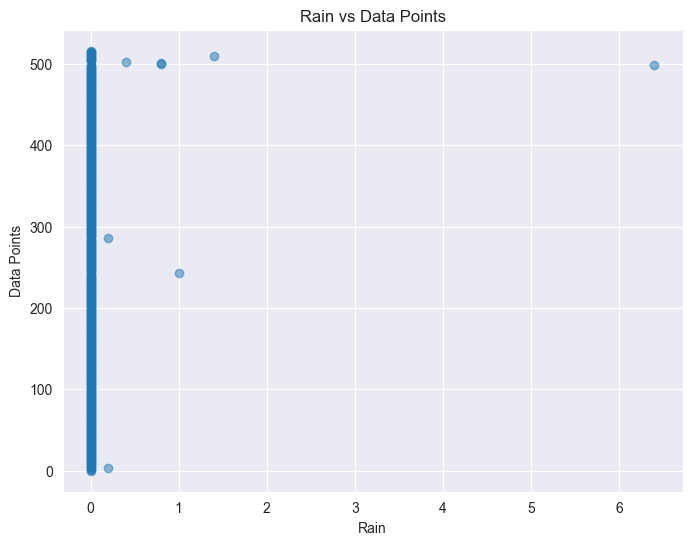

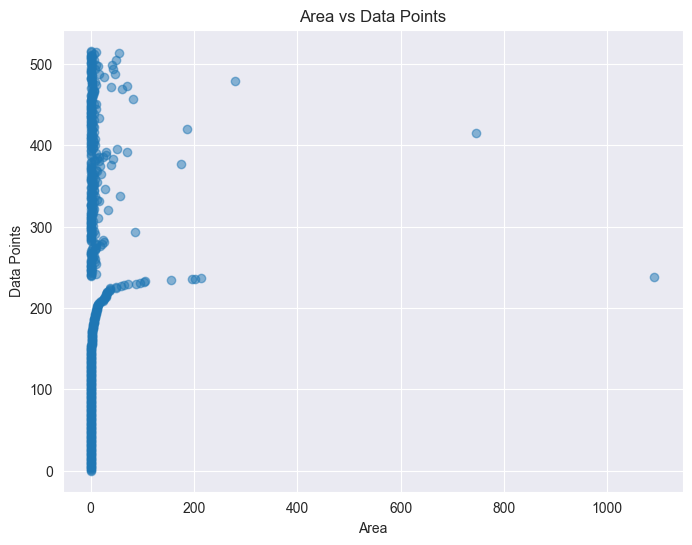

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('forestfires.csv')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create scatter plots using Matplotlib
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], range(len(df)), alpha=0.5)  # Use range(len(df)) as y-values
    plt.title(f"{column.capitalize()} vs Data Points")
    plt.xlabel(column.capitalize())
    plt.ylabel("Data Points")
    plt.grid(True)
    plt.show()


c:\Users\Zen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


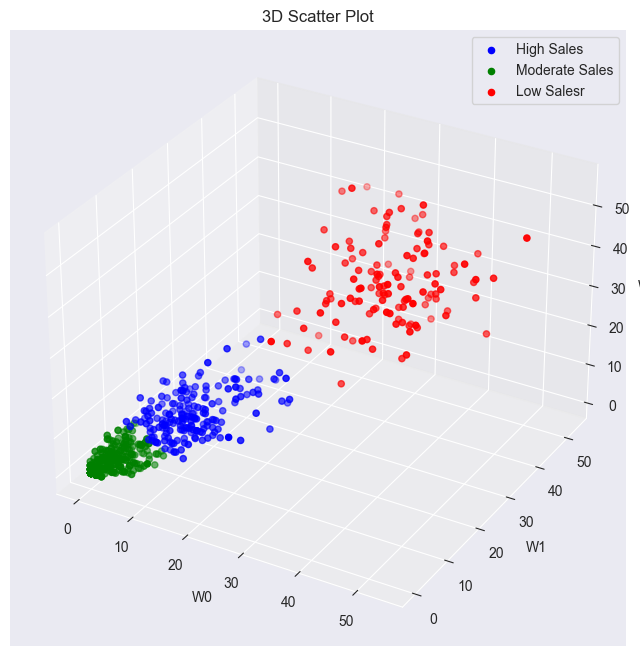

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Select features for clustering
features = ['W0', 'W1', 'W2']
X = df[features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Define meaningful names for clusters based on characteristics
# This is just an example, you should analyze your data to assign meaningful names
cluster_names = {
    0: 'Low Salesr',
    1: 'Moderate Sales',
    2: 'High Sales'
}

# Map cluster labels to the cluster column
df['cluster_name'] = df['cluster'].map(cluster_names)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters with meaningful labels
colors = ['r', 'g', 'b']
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    ax.scatter(cluster_data['W0'], cluster_data['W1'], cluster_data['W2'], c=colors[cluster], label=cluster_names[cluster])

ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('W2')
ax.set_title('3D Scatter Plot')
ax.legend()

plt.show()
